In [1]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import gvpy as gv
import velosearaptor

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [3]:
sbe = xr.open_dataset("../data/drifter_chain_2024_05/sbe39/proc/drifter_tchain_2024_05_13_sbe39_1102.nc")

In [4]:
adcp = xr.open_dataset("../data/drifter_chain_2024_05/adcp/proc/drifter_tchain_2024_05_13_adcp_3160.nc")

saving to /Users/gunnar/Projects/nesma/drifter/notebooks/fig/


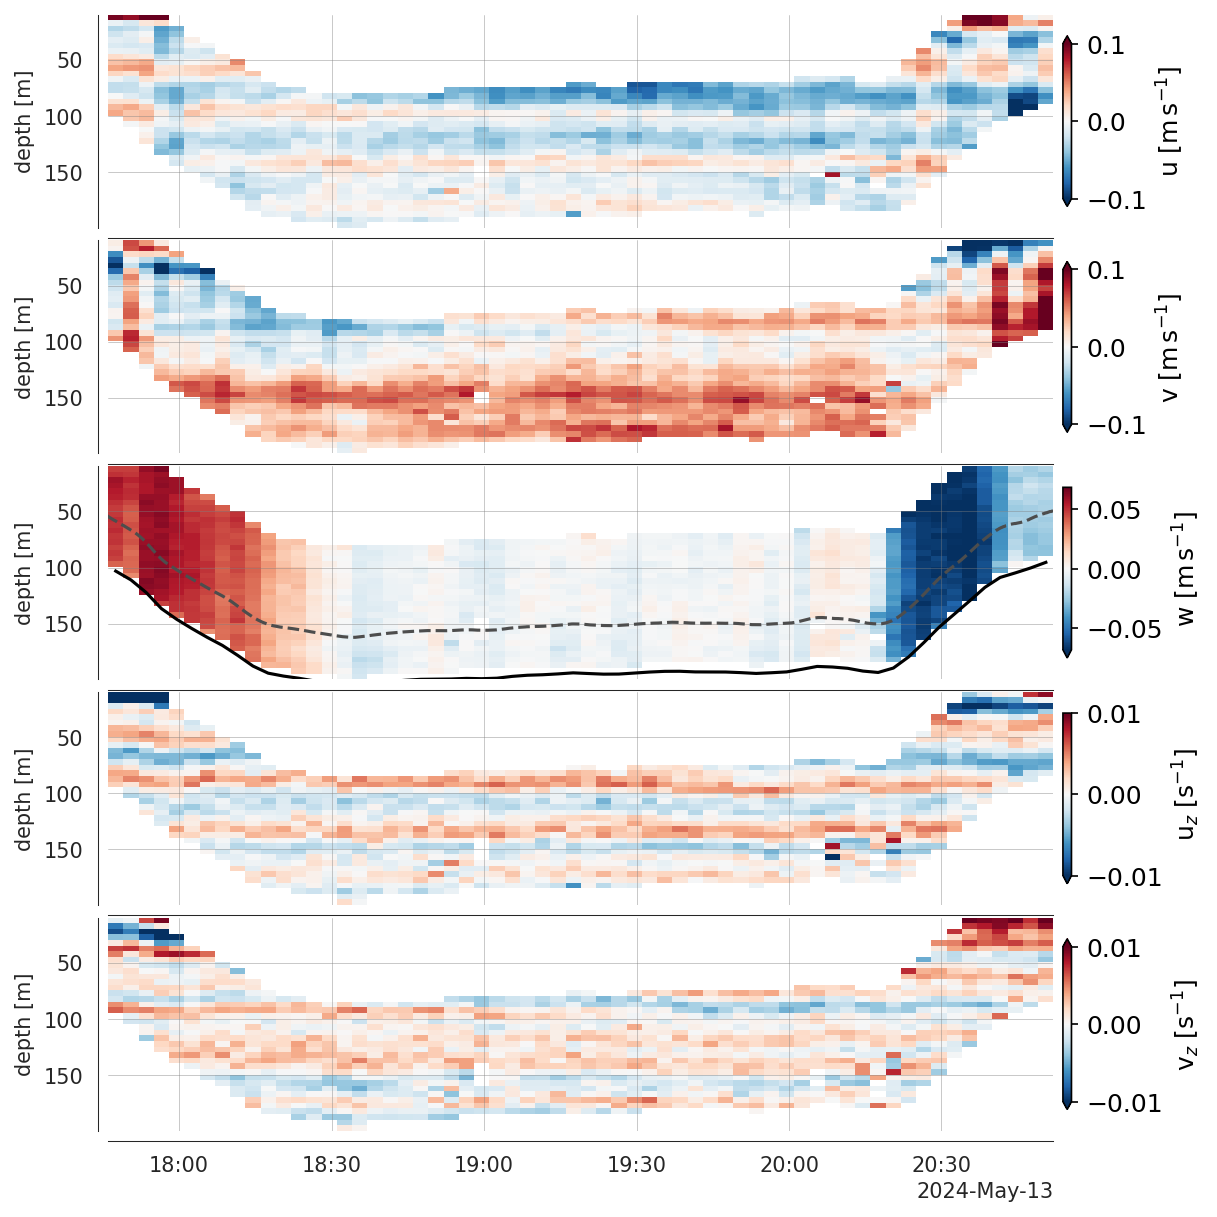

In [5]:
fig, ax = gv.plot.quickfig(r=5, sharex=True, fgs=(8, 8), grid=True)
adcp.u.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[0])
adcp.v.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[1])
adcp.w.gv.plot(robust=True, ax=ax[2])
adcp.xducer_depth.gv.plot(ax=ax[2], color="k")
sbe.p.gv.plot(ax=ax[2], color="0.3", linestyle="--")
ax[2].set(ylabel="depth [m]")

adcp.u.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[3],
    cbar_kwargs=dict(label="u$_z$ [s$^{-1}$]"),
)
adcp.v.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[4],
    cbar_kwargs=dict(label="v$_z$ [s$^{-1}$]"),
)
for axi in ax:
    axi.grid()

gv.plot.png("adcp_string_test_vel_and_shear")

In [6]:
tmp = sbe.p.interp_like(adcp.xducer_depth)

<Axes: ylabel='pressure [dbar]'>

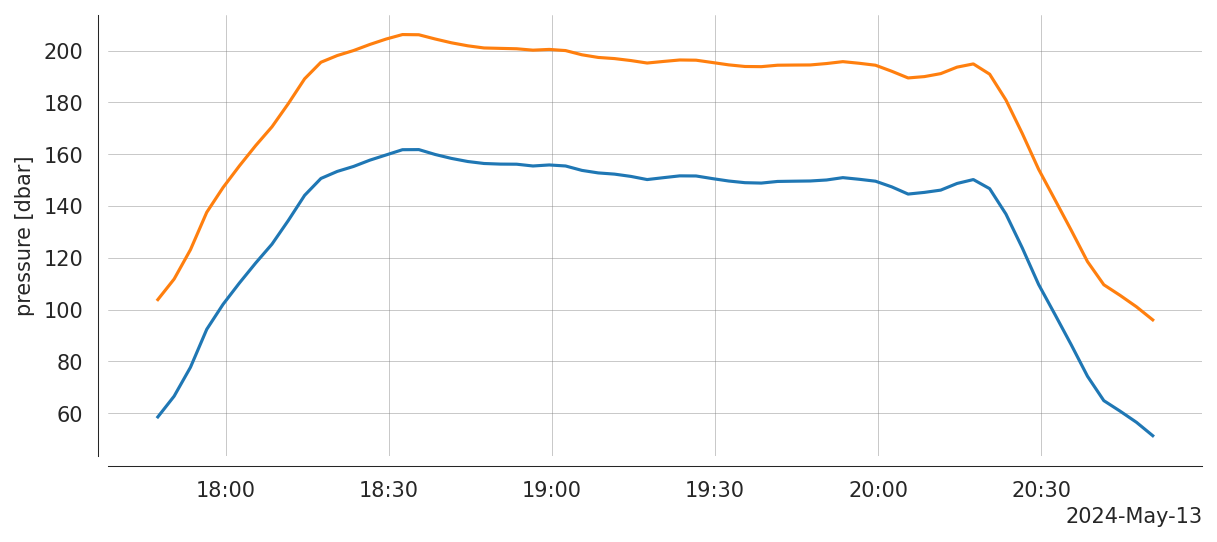

In [7]:
ax = tmp.gv.plot()
adcp.pressure.gv.plot(ax=ax)

saving to /Users/gunnar/Projects/nesma/drifter/notebooks/fig/


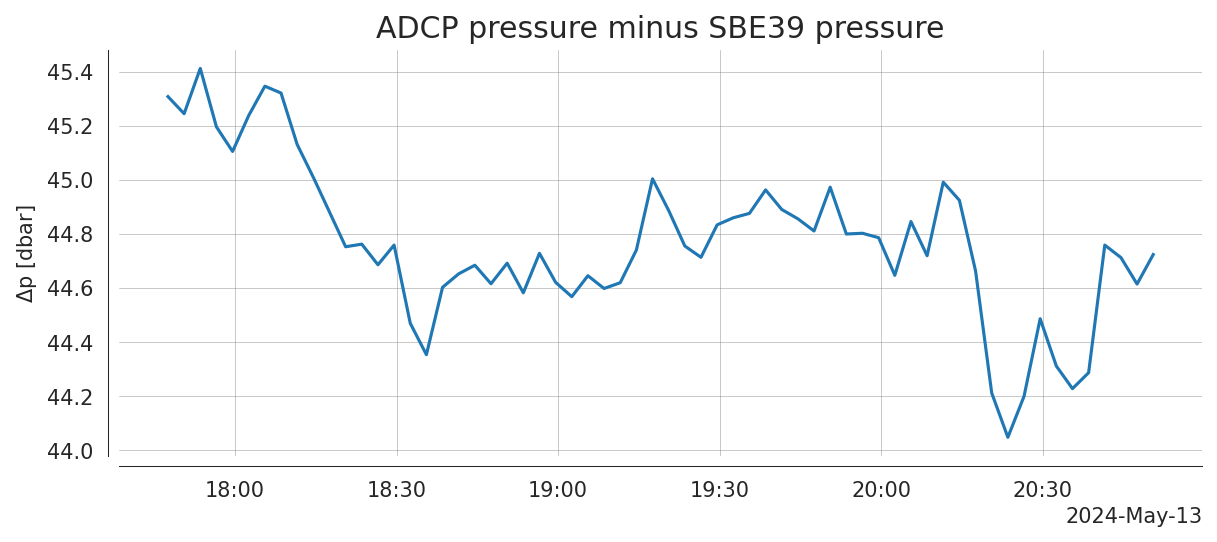

In [8]:
ax = (adcp.pressure - tmp).gv.plot()
ax.set(ylabel="$\Delta \mathrm{p}$ [dbar]", title="ADCP pressure minus SBE39 pressure")
gv.plot.png("adcp_string_test_delta_pressure")